In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Audio preprocessing

### Convert audio to mel-spectrogram

In [2]:
dataset_audio_path = "/content/drive/MyDrive/PBL7/Data/audio"
spectrogram_path = "/content/drive/MyDrive/PBL7/Data/spectrogram"

In [3]:
import pandas as pd

df_csv = pd.read_csv("/content/drive/MyDrive/PBL7/Data/tracks_metadata.csv")

In [4]:
df_csv

,track_title,track_url,track_album,genre,track_id,preview_mp3,duration,artist_name,artist_url,release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,...Baby One More Time,https://open.spotify.com/track/3MjUtNVVq3C8Fn0...,...Baby One More Time (Digital Deluxe Version),Pop,3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/174e01719c3b06ee...,3:31,Britney Spears,https://open.spotify.com/artist/26dSoYclwsYLMA...,1999-01-12T00:00:00Z,...,0.0,-5.745,0.0,0.0307,0.20200,0.000131,0.4430,0.9070,92.960,4.0
1,DJ Got Us Fallin' In Love (feat. Pitbull),https://open.spotify.com/track/4356Typ82hUiFAy...,Raymond v Raymond (Expanded Edition),Pop,4356Typ82hUiFAynbLYbPn,https://p.scdn.co/mp3-preview/1619c7342806281d...,3:40,USHER,https://open.spotify.com/artist/23zg3TcAtWQy7J...,2010-03-30T00:00:00Z,...,7.0,-3.398,0.0,0.1090,0.03380,0.000000,0.0820,0.6540,119.963,4.0
2,People,https://open.spotify.com/track/26b3oVLrRUaaybJ...,People,Pop,26b3oVLrRUaaybJulow9kz,https://p.scdn.co/mp3-preview/abcbc9adf10ae490...,3:4,Libianca,https://open.spotify.com/artist/7kjSuFGKhLm8b5...,2022-12-06T00:00:00Z,...,10.0,-7.621,0.0,0.0678,0.55100,0.000013,0.1020,0.6930,124.357,5.0
3,Somebody That I Used To Know,https://open.spotify.com/track/1qDrWA6lyx8cLEC...,Making Mirrors,Pop,1qDrWA6lyx8cLECdZE7TV7,https://p.scdn.co/mp3-preview/36e1e9984c1a58cb...,4:4,Gotye,https://open.spotify.com/artist/2AsusXITU8P25d...,2011-01-01T00:00:00Z,...,0.0,-6.932,1.0,0.0371,0.54800,0.000115,0.0989,0.7480,129.059,4.0
4,Murder On The Dancefloor,https://open.spotify.com/track/4tKGFmENO69tZR9...,Read My Lips,Pop,4tKGFmENO69tZR9ahgZu48,https://p.scdn.co/mp3-preview/340bdf7b29f2725f...,3:50,Sophie Ellis-Bextor,https://open.spotify.com/artist/2cBh5lVMg222FF...,2002-06-06T00:00:00Z,...,1.0,-5.281,0.0,0.0299,0.00234,0.000026,0.3120,0.8870,117.310,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8319,Concerto for Flute and String Orchestra: I. An...,https://open.spotify.com/track/1kfmtzWgmbZWcyA...,Concerto for Flute and String Orchestra: I. An...,classical,1kfmtzWgmbZWcyARriIyoc,https://p.scdn.co/mp3-preview/3661ee9f9648b2ec...,6:39,André Jolivet,https://open.spotify.com/artist/5RLjTTgn3q1gx0...,2024-05-03T00:00:00Z,...,4.0,-26.549,0.0,0.0444,0.97300,0.412000,0.0683,0.0819,135.197,4.0
8320,Wedding in the Carpathians (1938): Allegro viv...,https://open.spotify.com/track/7yGgY0UAHyeKTzV...,Piano Concerto/ Wedding in the carpathians,classical,7yGgY0UAHyeKTzVLAnPKKA,https://p.scdn.co/mp3-preview/108b39a48ddd6f4c...,1:20,Paul Constantinescu,https://open.spotify.com/artist/0DKEKOqm05e1gO...,2024-05-03T00:00:00Z,...,5.0,-28.691,1.0,0.0428,0.97600,0.273000,0.7050,0.1140,107.951,3.0
8321,"Sonata for Violin & Cello, M. 73: III. Lent",https://open.spotify.com/track/0wPblZFusgHJYrt...,"Sonata for Violin & Cello, M. 73: III. Lent",classical,0wPblZFusgHJYrt2rcEDHw,https://p.scdn.co/mp3-preview/fd98ee8e7d5d5520...,6:25,Maurice Ravel,https://open.spotify.com/artist/17hR0sYHpx7VYT...,2024-05-03T00:00:00Z,...,9.0,-21.796,0.0,0.0497,0.98600,0.884000,0.0706,0.0373,106.614,4.0
8322,"Partita No. 1 in B-Flat Major, BWV 825: I. Pre...",https://open.spotify.com/track/5QRPfmI6oWCXuKv...,Bach: Six Partitas,classical,5QRPfmI6oWCXuKvSZLvMBl,https://p.scdn.co/mp3-preview/639b5d212b7d4970...,2:8,Johann Sebastian Bach,https://open.spotify.com/artist/5aIqB5nVVvmFsv...,2024-05-03T00:00:00Z,...,9.0,-21.912,1.0,0.0402,0.78500,0.932000,0.2130,0.6980,179.638,4.0


In [ ]:
df_csv[df_csv['track_id'] == '1uARLLfeQPlBf1jSN4P0yK']['genre'].iloc[0]

'classical'

In [6]:
df_csv['genre'] = df_csv['genre'].str.lower()

In [8]:
import os

folders = os.listdir("/content/drive/MyDrive/PBL7/Data/spectrogram")
print(len(folders))

8324


In [7]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import librosa
import matplotlib.pyplot as plt

dataset_audio_path = "/content/drive/MyDrive/PBL7/Data/audio"
# dataset_audio_path = "/content/audio"
spectrogram_path = "/content/drive/MyDrive/PBL7/Data/spectrogram"

def create_spectrogram(audio_path : str, spectrogram_path : str) :
  if not os.path.exists(spectrogram_path) :
    os.makedirs(spectrogram_path)
  for files in os.listdir(dataset_audio_path) :
    for file in os.listdir(os.path.join(dataset_audio_path,files)) :
      if file.endswith(".mp3") :
        audio_path = os.path.join(dataset_audio_path, files, file)
        genre = df_csv[df_csv['track_id'] == file.split(".")[0]]['genre'].iloc[0]
        output_filename = f"{genre}_{file.replace('.mp3','.jpg')}"

        output_path = os.path.join(spectrogram_path, output_filename)
        # print(output_path)
        if not os.path.exists(output_path) :
          print(output_path)

          # read audio file and create mel-spectrogram
          y, sr = librosa.load(audio_path)
          mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

          # convert to color spectrum
          log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

          # save mel-spectrogram to image file
          fig_size = plt.rcParams['figure.figsize']
          fig_size[0] = float(log_mel_spectrogram.shape[1]) / float(100)
          fig_size[1] = float(log_mel_spectrogram.shape[0]) / float(100)
          plt.rcParams["figure.figsize"] = fig_size
          plt.axis('off')
          plt.axes([0., 0., 1., 1.0], frameon=False, xticks=[], yticks=[])
          librosa.display.specshow(log_mel_spectrogram, cmap='gray_r')
          plt.savefig(output_path, bbox_inches=None, pad_inches=0)
          plt.close()



create_spectrogram(dataset_audio_path, spectrogram_path)


/content/drive/MyDrive/PBL7/Data/spectrogram/instrumental_00ktuagJxL4lP7xyJ1d82N.jpg
/content/drive/MyDrive/PBL7/Data/spectrogram/rock_01iTCGEU89ojJoEe54HZGb.jpg
/content/drive/MyDrive/PBL7/Data/spectrogram/pop_01uqI4H13Gsd8Lyl1EYd8H.jpg
/content/drive/MyDrive/PBL7/Data/spectrogram/instrumental_01zpU0ewFP8tjG1J9We98x.jpg
/content/drive/MyDrive/PBL7/Data/spectrogram/instrumental_03DifiRgvdRwUsGhcuCtAG.jpg
/content/drive/MyDrive/PBL7/Data/spectrogram/pop_03x2rVJRFUrvwlfxoHd9Mo.jpg
/content/drive/MyDrive/PBL7/Data/spectrogram/pop_04sN26COy28wTXYj3dMoiZ.jpg
/content/drive/MyDrive/PBL7/Data/spectrogram/pop_05RmevbSKDvHHKpYBoXYfR.jpg
/content/drive/MyDrive/PBL7/Data/spectrogram/pop_05wIrZSwuaVWhcv5FfqeH0.jpg
/content/drive/MyDrive/PBL7/Data/spectrogram/instrumental_06Uu0bQNx2WMFIWY09nTxN.jpg
/content/drive/MyDrive/PBL7/Data/spectrogram/instrumental_06ZwqZmTvUVclp1a7a1Wka.jpg
/content/drive/MyDrive/PBL7/Data/spectrogram/instrumental_09fhTYGSgNoATa9MnNAHes.jpg
/content/drive/MyDrive/PBL7/Data/

In [ ]:
content = [f for f in os.listdir(spectrogram_path)]
print(len(content))

4010


In [ ]:
import os
from PIL import Image

# dataset_audio_path = "/content/drive/MyDrive/PBL7/Data/audio"
spectrogram_path = "/content/drive/MyDrive/PBL7/Data/spectrogram2"

files = [f for f in os.listdir(spectrogram_path) if not os.path.isdir(f)]
print(os.path.join(spectrogram_path,files[0]))
img = Image.open(os.path.join(spectrogram_path,files[0]))

/content/drive/MyDrive/PBL7/Data/spectrogram2/hiphop_5FG7Tl93LdH117jEKYl3Cm.jpg


1280 128


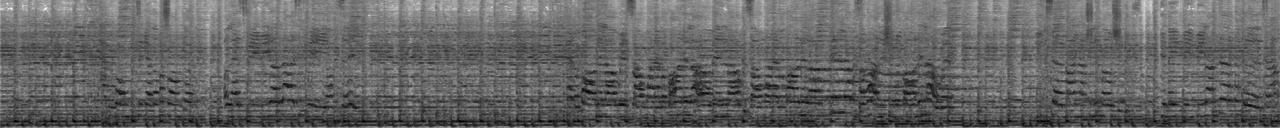

In [ ]:
img = Image.open("/content/drive/MyDrive/PBL7/Data/spectrogram2/rock_5YUJMvTg4AWHKjqQidTsGK.jpg")
width, height = img.size
print(width, height)
img